<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/NLP_hack_GA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.corpus
# import Pattern
# from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import emoji
import re
import string
toker = RegexpTokenizer(r'((?<=[^\w\s])\w(?=[^\w\s])|(\W))+', gaps=True)
wnl = WordNetLemmatizer()

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [ ]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [ ]:
train['tweet']=train['tweet'].apply(lambda x:str(x))
test['tweet']=test['tweet'].apply(lambda x:str(x))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


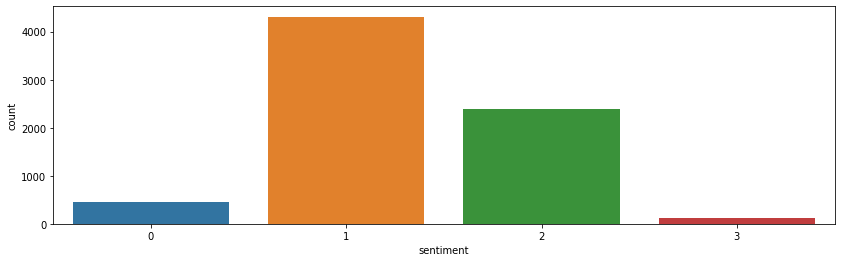

In [ ]:
sns.countplot(train['sentiment'])

In [ ]:
train['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [ ]:
# i=0
# def clean_emoji(text):
#     for c in text:
#         if c in emoji.UNICODE_EMOJI:
#             print(text)
#             print(c)
#             a=emoji.demojize(text)
#             print(a)
#             st = (a.encode('ascii', 'ignore')).decode("utf-8")
#             print(st)
#             return a
#     return text
# train['tweet'] = train['tweet'].apply(clean_emoji)

In [ ]:
def clean_emoji(text):
#     print(text)
    for c in text:
        if c in emoji.UNICODE_EMOJI:
            a=emoji.demojize(text)
            return a
    return text
train['tweet'] = train['tweet'].apply(clean_emoji)
test['tweet'] = test['tweet'].apply(clean_emoji)

In [ ]:
def check_encoding(text):
    st = (text.encode('ascii', 'ignore')).decode("utf-8")
    return st
train['tweet'] = train['tweet'].apply(lambda x : check_encoding(x))
test['tweet'] = test['tweet'].apply(lambda x : check_encoding(x))

In [ ]:
# def remove_punct(text):
#     text  = "".join([char for char in str(text) if char not in string.punctuation])
#     text = re.sub('[0-9]+', '', text)
#     return text

# train['tweet'] = train['tweet'].apply(lambda x: remove_punct(x))

In [ ]:
# train['tweet']= train['tweet'].apply(lambda x:word_tokenize(x))

In [ ]:
train['hastags']=train['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
test['hastags']=test['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
def remove_extra(text):
    text=text.replace('@mention',"")
    text=text.replace('link',"")
    text=text.replace('#',"")
    return text
        
train['tweet']= train['tweet'].apply(remove_extra)
test['tweet']= test['tweet'].apply(remove_extra)

In [ ]:
train['tweet']=train['tweet'].apply(lambda x:re.sub(r'http\S+', '', x))
test['tweet']=test['tweet'].apply(lambda x:re.sub(r'http\S+', '', x))

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in str(text) if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train['tweet'] = train['tweet'].apply(lambda x: remove_punct(x))
test['tweet'] = test['tweet'].apply(lambda x: remove_punct(x))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   7274 non-null   int64 
 1   tweet      7274 non-null   object
 2   sentiment  7274 non-null   int64 
 3   hastags    7274 non-null   object
dtypes: int64(2), object(2)
memory usage: 227.4+ KB


In [ ]:
def clean(text):
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split(" "))
    text = " ".join(chunk.lower() for chunk in chunks if chunk)
    text = " ".join(word for word in text.split(' ') if not word.startswith('sxsw'))
    tokens = [token.lower() for token in toker.tokenize(text)]
#     token_stopwords = [w.lower() for w in tokens if w not in stopwords]
    token_lemmatize = [wnl.lemmatize(token) for token in tokens]
    text = " ".join(text.lower() for text in token_lemmatize if text)
    return text

In [ ]:
# for i in train[['hastags','sentiment']]:
#     print(i)
# ft=[]
# for i,value in enumerate(train['sentiment']):
#     if value==1:
#         ft.append(train.iloc[i]['hastags'])

In [ ]:
3

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train['tweet'] = train['tweet'].apply(lambda x:clean(x))
test['tweet'] = test['tweet'].apply(lambda x:clean(x))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import itertools 
import re
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import TfidfModel 
from gensim.corpora import Dictionary
from gensim import corpora
from gensim import models
from nltk.tokenize import WordPunctTokenizer


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_data(sentence):
    ## removing web links
    s = [ re.sub(r'http\S+', '', sentence.lower())]
    ## removing words like gooood and poooor to good and poor
    s = [''.join(''.join(s)[:2] for _, s in itertools.groupby(s[0]))]
    ## removing appostophes
    s = [remove_appostophes(s[0])]
    ## removing punctuations from the code 
    s = [remove_punctuations(s[0])]
    return s[0]

In [ ]:
def remove_punctuations(my_str):
    punctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    no_punct = ""
    for char in my_str:
       if char not in punctuations:
           no_punct = no_punct + char
    return no_punct

In [ ]:
def remove_appostophes(sentence):
    APPOSTOPHES = {"s" : "is", "re" : "are", "t": "not", "ll":"will","d":"had","ve":"have","m": "am"}
    words = nltk.tokenize.word_tokenize(sentence)
    final_words=[]
    for word in words:
        broken_words=word.split("'")
        for single_words in broken_words:
            final_words.append(single_words)
    reformed = [APPOSTOPHES[word] if word in APPOSTOPHES else word for word in final_words]
    reformed = " ".join(reformed)
    return reformed

In [ ]:
for index in range(0,len(train["tweet"])):
  #print(training_dataset["sms"].iloc[index])
  train.loc[index,"tweet"] = clean_data(train["tweet"].iloc[index])

In [ ]:
train.head()

,tweet_id,tweet,sentiment,hastags
0,1701,apple defining language of touch with differen...,1,"[sxswnui, sxsw, apple]"
1,1851,learning ab google doodle all doodle should be...,1,"[GoogleDoodle, sxsw]"
2,2689,one of the most inyourface ex of stealing the ...,2,[SXSW]
3,4525,this iphone app would b pretty awesome if it d...,0,"[SXSW, Fuckit, Illmakeitwork]"
4,3604,line outside the apple store in austin waiting...,1,[SXSW]


In [ ]:
def my_tokeniser(s):
    s = clean_data(s)
    s = s.lower()
    stoplist  = set(stopwords.words('english')) 
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stoplist ]
    return tokens

In [ ]:
def get_grams(label,n):
    bigrams = []
    for sentence in train[train["sentiment"]==label]["tweet"]:
        tokens = my_tokeniser(sentence)
        bigrams.append(tokens)
    bigrams_final=[]
    bigrams_values=0
    bigrams_labels=0
    
    if(n==2):
        for bigram in bigrams:
            for i in range(0,len(bigram)-1):
                bigram_list_basic=bigram[i]+" "+bigram[i+1]
                bigrams_final.append(bigram_list_basic)
    else:
        for bigram in bigrams:
            for i in range(0,len(bigram)-2):
                bigram_list_basic=bigram[i]+" "+bigram[i+1]+" "+bigram[i+2]
                bigrams_final.append(bigram_list_basic)
                
    bigrams_final = pd.DataFrame(bigrams_final) 
    bigrams_final.columns=["bigrams"]
    bigrams_values=bigrams_final.groupby("bigrams")["bigrams"].count()
    bigrams_labels=bigrams_final.groupby("bigrams").groups.keys()
    bigrams_final_result = pd.DataFrame(
    {
        "bigram":[*bigrams_labels],
        "count":bigrams_values
    }
    )
    return bigrams_final_result

In [ ]:
def plot_grams(sentiment_label,gram_n,height=4, width=14):
    bigrams_final = get_grams(sentiment_label,gram_n)
    bigrams_final = bigrams_final.sort_values("count",ascending=False).iloc[:15]
    plt.barh(bigrams_final["bigram"],bigrams_final["count"], align="center", alpha=0.7)
    plt.xlabel('Count')
    plt.title('Most common bigrams')
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.show()
    plt.rcParams["figure.figsize"] = fig_size

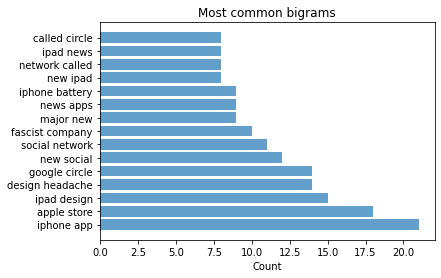

In [ ]:
plot_grams(sentiment_label=0, gram_n=2)

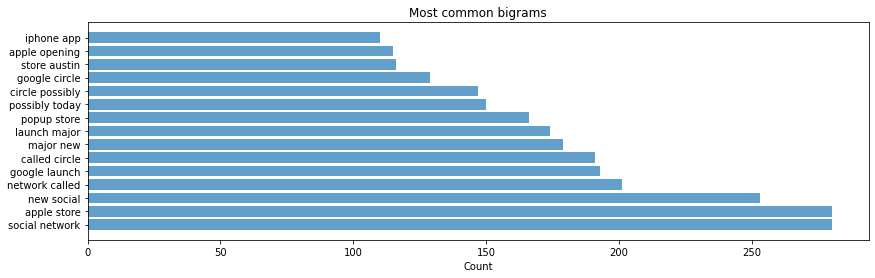

In [ ]:
plot_grams(sentiment_label=1, gram_n=2)

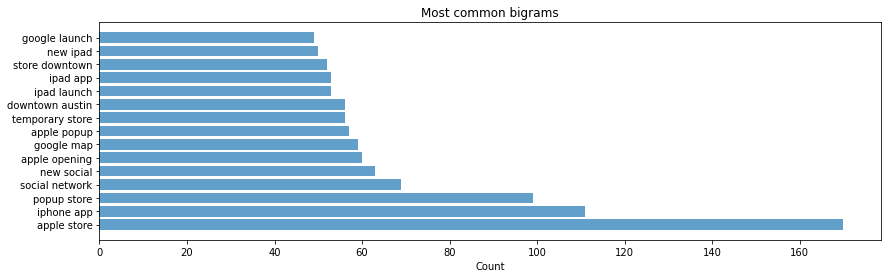

In [ ]:
plot_grams(sentiment_label=2, gram_n=2)

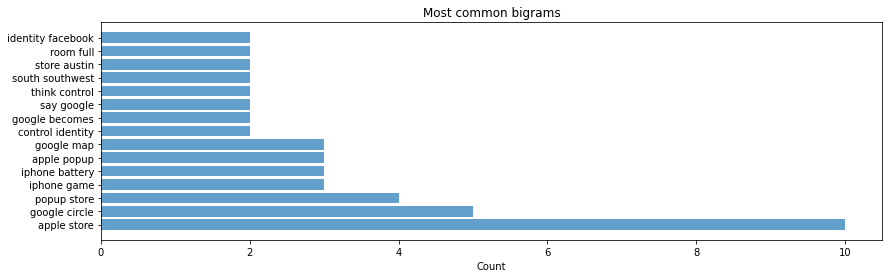

In [ ]:
plot_grams(sentiment_label=3, gram_n=2)

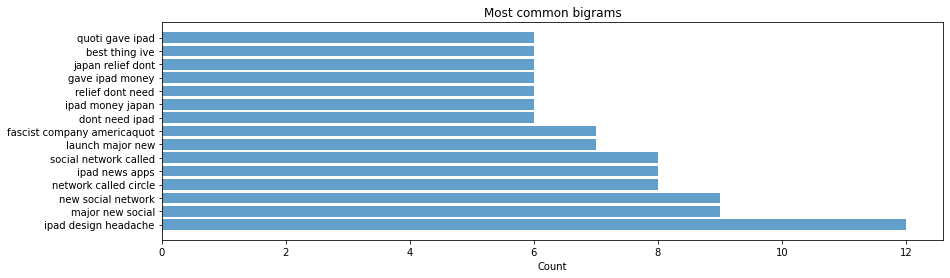

In [ ]:
plot_grams(sentiment_label=0, gram_n=3)

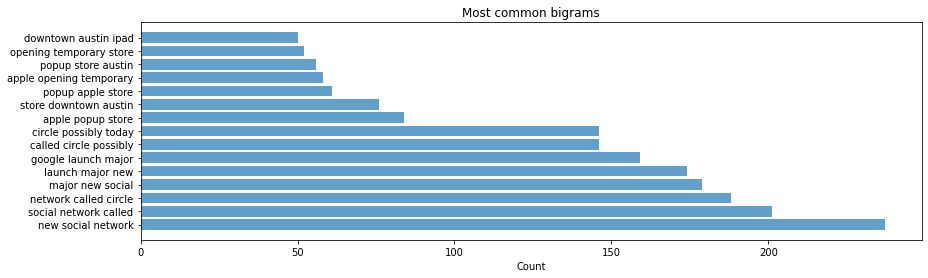

In [ ]:
plot_grams(sentiment_label=1, gram_n=3)

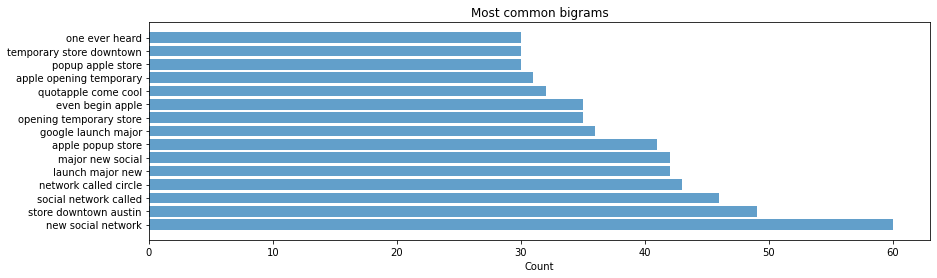

In [ ]:
plot_grams(sentiment_label=2, gram_n=3)

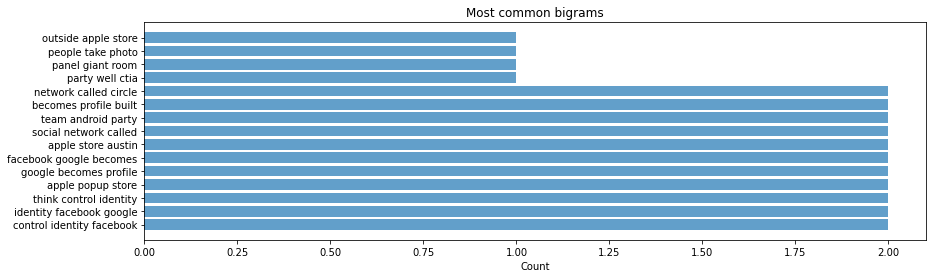

In [ ]:
plot_grams(sentiment_label=3, gram_n=3)

In [ ]:
def get_tfidf_matrix(documents): 
    documents=[my_tokeniser(document) for document in documents]
    dictionary = corpora.Dictionary(documents)
    n_items = len(dictionary)
    corpus = [dictionary.doc2bow(text) for text in documents]
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    return corpus_tfidf 

In [ ]:
def get_tfidf_score_dataframe(sentiment_label):
    frames = get_tfidf_matrix(train[train["sentiment"]==sentiment_label]["tweet"])
    all_score=[]
    all_words=[]
    sentence_count=0
    for frame in frames:
        words=my_tokeniser(train[train["sentiment"]==sentiment_label]["tweet"].iloc[sentence_count])
        sentence_count=sentence_count+1
        for i in range(0,len(frame)):
            all_score.append(frame[i])
            all_words.append(words[i])
    tf_idf_frame=pd.DataFrame({
        'Words': all_words,
        'Score': all_score
    })
    count=0
    for key, val in tf_idf_frame["Score"]:
        tf_idf_frame["Score"][count] = val
        count=count+1
    return tf_idf_frame

In [ ]:
def plot_tf_idf_wordcloud(sentiment_label):
    tf_idf_frame = get_tfidf_score_dataframe(sentiment_label)
    sorted_tf_idf_frame=tf_idf_frame.sort_values("Score", ascending=False)
    important_negative_words=sorted_tf_idf_frame[sorted_tf_idf_frame["Score"]==1]["Words"].unique()
    comment_words=''
    for words in important_negative_words: 
        comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = set(stopwords.words('english')),
                    min_font_size = 10).generate(comment_words)                    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

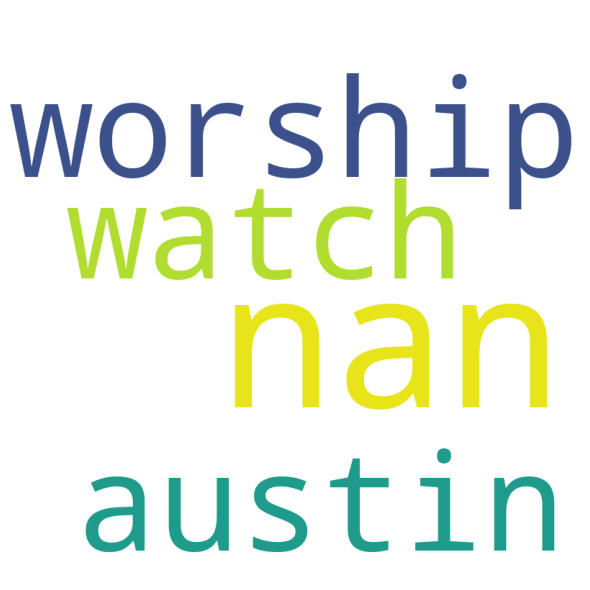

In [ ]:
plot_tf_idf_wordcloud(sentiment_label=1)

In [ ]:
train.head()

,tweet_id,tweet,sentiment,hastags
0,1701,apple defining language of touch with differen...,1,"[sxswnui, sxsw, apple]"
1,1851,learning ab google doodle all doodle should be...,1,"[GoogleDoodle, sxsw]"
2,2689,one of the most inyourface ex of stealing the ...,2,[SXSW]
3,4525,this iphone app would b pretty awesome if it d...,0,"[SXSW, Fuckit, Illmakeitwork]"
4,3604,line outside the apple store in austin waiting...,1,[SXSW]


In [ ]:
for i in test['tweet']:
    print(i)

audience     q     what     prototyping     tool     do     you     use     sketchbookssharpie     pen     photoshop     balsamic     google     doc     axsure     etc     myprototype
at     send     your     best     photo     amp     video     to     citizenjournalism     cnn     ireport     photography     cyber     iphone
and     here     a     pic     of     you     winning     your     ipad     unsix     cc     cont
google     marissa     mayer     mobile     phone     a     a     cursor     of     physical     location     new     version     of     map     fast     and     more     real     life     like
google     map     is     even     cooler     than     i     thought
rt     in     front     of     popup     store     at     last     night
rt     in     my     next     life     im     coming     back     a     an     ipad     woman     cant     keep     their     hand     off     this     thing
google     celebrating     pi     day     in     style     at
hmmm     is     it

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(train['tweet'].values, train['sentiment'].values,random_state=42, test_size=0.2, shuffle=True)

In [ ]:
print (xtrain.shape)
print (xvalid.shape)
print(ytrain.shape)
print (yvalid.shape)

(5819,)
(1455,)
(5819,)
(1455,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(xtrain) 
tfv.fit(xvalid)
tfv.fit(test['tweet'])
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv =  tfv.transform(xvalid) 
xtest_tfv  =  tfv.transform(test['tweet'])

In [ ]:
xtest_tfv.shape , xtrain_tfv.shape

((1819, 1898), (5819, 1898))

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
from sklearn import metrics

In [ ]:
rf= RandomForestClassifier()
rf.fit(xtrain_tfv,ytrain)
rf_pred=rf.predict(xvalid_tfv)
# predictions = clf.predict(xvalid_tfv)



from sklearn.metrics import f1_score, accuracy_score

# print(f1_score(yvalid, rf_pred))
print(metrics.confusion_matrix(yvalid, rf_pred))

[[ 11  50  16   0]
 [  8 746 115   2]
 [  3 291 186   3]
 [  2  18   4   0]]


In [ ]:
print(metrics.classification_report(yvalid, rf_pred, digits=3))

              precision    recall  f1-score   support

           0      0.458     0.143     0.218        77
           1      0.675     0.856     0.755       871
           2      0.579     0.385     0.463       483
           3      0.000     0.000     0.000        24

    accuracy                          0.648      1455
   macro avg      0.428     0.346     0.359      1455
weighted avg      0.621     0.648     0.617      1455



In [ ]:
test_pred = rf.predict(xtest_tfv)
submission = pd.DataFrame({'tweet_id':sub['tweet_id'],'sentiment':test_pred})




filename = 'GA_NLP_submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: GA_NLP_submission.csv


In [ ]:
sub

,tweet_id,sentiment
0,7506,0
1,7992,0
2,247,0
3,7688,0
4,3294,0
...,...,...
1814,1550,0
1815,1933,0
1816,9052,0
1817,4219,0
